In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
np.random.seed(123)

In [2]:
def modify_initial_condition(y0, prop_imported):
    y0_aux = y0.copy()
    y0[1] = y0_aux[1] - y0_aux[1]*prop_imported 
    y0[2] = y0_aux[2] + y0_aux[1]*prop_imported
    y0[3] = y0_aux[3] - y0_aux[3]*prop_imported
    y0[4] = y0_aux[4] + y0_aux[3]*prop_imported 
    y0[6] = y0_aux[6] - y0_aux[6]*prop_imported 
    y0[7] = y0_aux[7] + y0_aux[6]*prop_imported 
    return y0

In [3]:
def three_groups_model(y, t, beta, mu_0, mu_1, mu_2, gamma, l_0, l_1,  nu):
    S_0, I_0, R_0, S_1, I_1, R_1, S_2, I_2, R_2 = y
    I_T = I_0 + I_1 + I_2
    dS_0dt = nu - beta*S_0*I_T - mu_0*S_0 - l_0*S_0
    dI_0dt = beta*S_0*I_T - gamma*I_0 - mu_0*I_0 - l_0*I_0
    dR_0dt = gamma*I_0 - mu_0*R_0 - l_0*R_0
    dS_1dt = -l_1*S_1 + l_0*S_0 - mu_1*S_1 - beta*S_1*I_T
    dI_1dt = -l_1*I_1 + l_0*I_0 - mu_1*I_1 + beta*S_1*I_T - gamma*I_1
    dR_1dt = -l_1*R_1 + l_0*R_0 - mu_1*R_1 + gamma*I_1
    dS_2dt = l_1*S_1 - mu_2*S_2 - beta*S_2*I_T 
    dI_2dt = l_1*I_1 - mu_2*I_2 + beta*S_2*I_T - gamma*I_2
    dR_2dt = l_1*R_1 - mu_2*R_2 + gamma*I_2 
    return [dS_0dt,dI_0dt,dR_0dt,dS_1dt,dI_1dt,dR_1dt,dS_2dt,dI_2dt,dR_2dt]

In [4]:
def three_groups_seasonal_model(y, t, beta_0, beta_aug, t_start, t_season, t_year, mu_0, mu_1, mu_2, gamma, l_0, l_1, nu):
    S_0, I_0, R_0, S_1, I_1, R_1, S_2, I_2, R_2 = y
    I_T = I_0 + I_1 + I_2
    beta = beta_step(beta_0,beta_aug,t_start,t_season,t_year,t)
    dS_0dt = nu - beta*S_0*I_T - mu_0*S_0 - l_0*S_0
    dI_0dt = beta*S_0*I_T - gamma*I_0 - mu_0*I_0 - l_0*I_0
    dR_0dt = gamma*I_0 - mu_0*R_0 - l_0*R_0
    dS_1dt = -l_1*S_1 + l_0*S_0 - mu_1*S_1 - beta*S_1*I_T
    dI_1dt = -l_1*I_1 + l_0*I_0 - mu_1*I_1 + beta*S_1*I_T - gamma*I_1
    dR_1dt = -l_1*R_1 + l_0*R_0 - mu_1*R_1 + gamma*I_1
    dS_2dt = l_1*S_1 - mu_2*S_2 - beta*S_2*I_T 
    dI_2dt = l_1*I_1 - mu_2*I_2 + beta*S_2*I_T - gamma*I_2
    dR_2dt = l_1*R_1 - mu_2*R_2 + gamma*I_2
    return [dS_0dt,dI_0dt,dR_0dt,dS_1dt,dI_1dt,dR_1dt,dS_2dt,dI_2dt,dR_2dt]

In [5]:
@np.vectorize
def beta_step(beta_0,beta_aug,t_start,t_season,t_year,t):
  # beta_0 is the basal beta
  # beta_aug is the beta at high transmission season
  # t_start is start time of the high transmission season
  # t_season is the duration of the high transmission season
  # t_year is the duration of a year (giving the function periodicity)
  # t is current time time
  # normalize time up to a year
  t_norm = t%t_year
  # and now we look for the value of the function
  if(t_norm >= t_start and t_norm <= t_start + t_season):
    value = beta_aug
  else:
    value = beta_0
  return value

## Three age groups - no seasonality

In [6]:
alpha_0 = 0.25
alpha_1 = 0.50
alpha_2 = 0.25


beta = 3*(1/7.0) 
gamma = 1/(7.0)
l_0 = 1/(10*365)
l_1 = 1/(70*365)

mu_0 = 0.0
mu_1 = (l_0*alpha_0 - l_1*alpha_1)/(alpha_1)
mu_2 = (l_1*alpha_1)/(alpha_2)
nu = (l_0 + mu_0)*(alpha_0)

y0 = alpha_0, 0.0, 0.0, alpha_1*0.9, alpha_1*0.1, 0.0, alpha_2, 0.0, 0.0
t = np.linspace(0, 365*20, 365*20)

In [7]:
ret = odeint(three_groups_model, y0, t, args = (beta, mu_0, mu_1, mu_2, gamma, l_0, l_1,  nu))

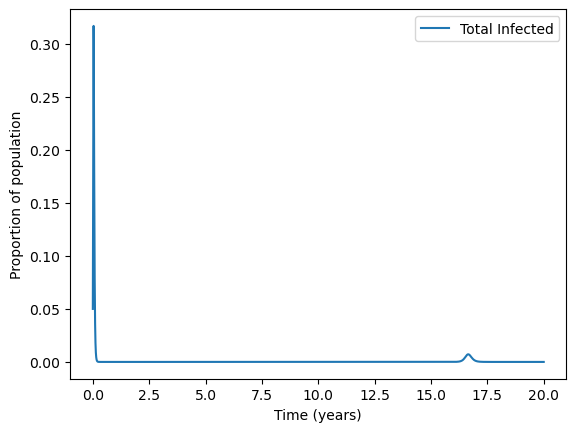

In [9]:
plt.plot(t/365,ret[:,1]+ret[:,4]+ret[:,7], label = 'Total Infected')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.legend()
plt.show()

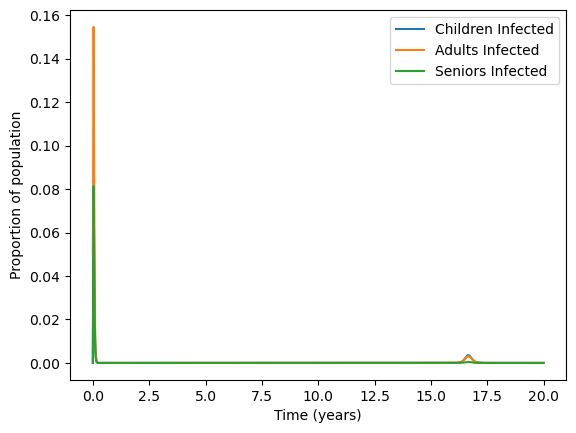

In [11]:
plt.plot(t/365, ret[:,1], label = 'Children Infected')
plt.plot(t/365, ret[:,4], label = 'Adults Infected')
plt.plot(t/365, ret[:,7], label = 'Seniors Infected')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.legend()
plt.show()

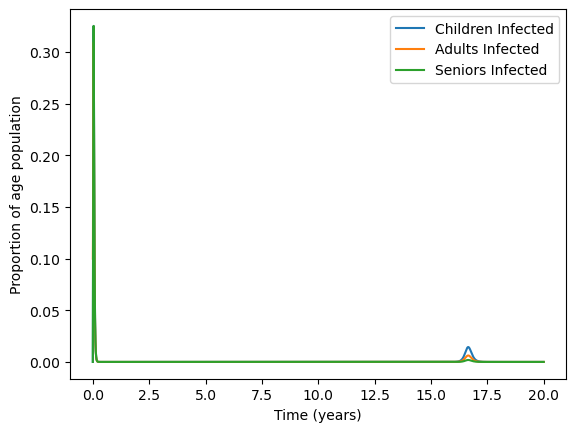

In [12]:
plt.plot(t/365, ret[:,1]/alpha_0, label = 'Children Infected')
plt.plot(t/365, ret[:,4]/alpha_1, label = 'Adults Infected')
plt.plot(t/365, ret[:,7]/alpha_2, label = 'Seniors Infected')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

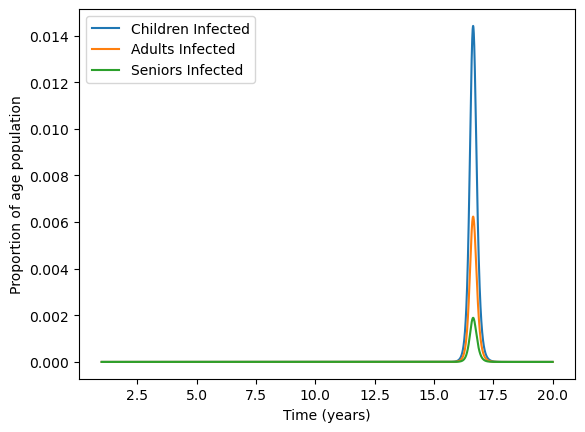

In [13]:
plt.plot(t[365:]/365, ret[365:,1]/alpha_0, label = 'Children Infected')
plt.plot(t[365:]/365, ret[365:,4]/alpha_1, label = 'Adults Infected')
plt.plot(t[365:]/365, ret[365:,7]/alpha_2, label = 'Seniors Infected')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

In [14]:
IT = ret[:,1] + ret[:,4] + ret[:,7]
prop_0_year = []
prop_1_year = []
prop_2_year = []

for i in range(20):
    total_cases = sum(ret[i*365:(i+1)*365,1]) + sum(ret[i*365:(i+1)*365,4]) + sum(ret[i*365:(i+1)*365,7])
    prop_0_year.append(sum(ret[i*365:(i+1)*365,1])/(alpha_0*total_cases))
    prop_1_year.append(sum(ret[i*365:(i+1)*365,4])/((alpha_1)*total_cases))
    prop_2_year.append(sum(ret[i*365:(i+1)*365,7])/((alpha_2)*total_cases))

Text(0, 0.5, 'Age Group Rate')

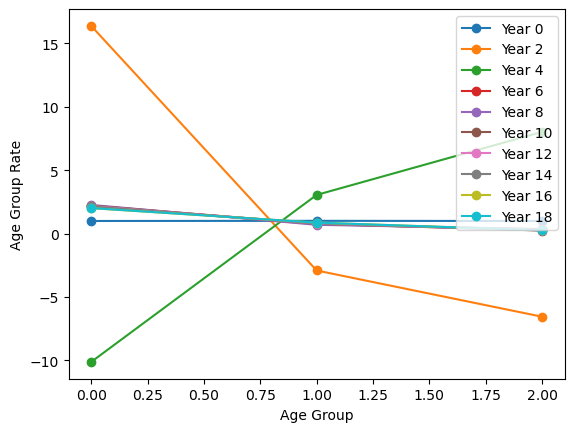

In [15]:
for i in range(10):
    plt.plot([0,1,2],[prop_0_year[2*i], prop_1_year[2*i], prop_2_year[2*i]], '-o', label = 'Year '+str(2*i))
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Age Group Rate')

## Three age groups -  seasonality

In [16]:
alpha_0 = 0.25
alpha_1 = 0.50
alpha_2 = 0.25


beta_0 = 0.0 
beta_aug = 3*(1/7.0) # run with 5 as well
t_start = 0
t_season = 60
t_year = 365

gamma = 1/(7.0)
l_0 = 1/(10*365)
l_1 = 1/(70*365)

mu_0 = 0.0
mu_1 = (l_0*alpha_0 - l_1*alpha_1)/(alpha_1)
mu_2 = (l_1*alpha_1)/(alpha_2)
nu = (l_0 + mu_0)*(alpha_0)

y0 = alpha_0, 0.0, 0.0, alpha_1*0.9, alpha_1*0.1, 0.0, alpha_2, 0.0, 0.0
t = np.linspace(0, 365*20, 365*20)


In [17]:
ret = odeint(three_groups_seasonal_model, y0, t, args = (beta_0, beta_aug, t_start, t_season, t_year, mu_0, mu_1, mu_2, gamma, l_0, l_1,  nu))

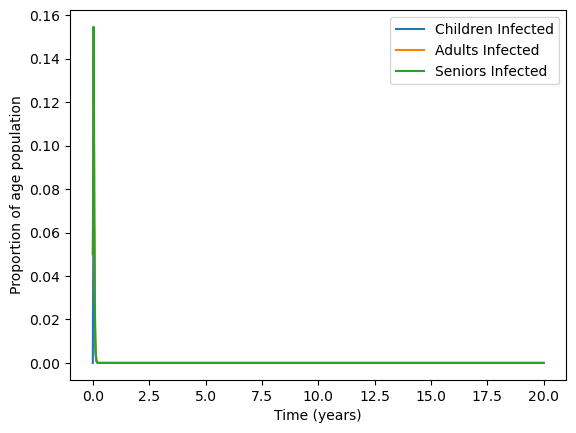

In [18]:
plt.plot(t/365, ret[:,1], label = 'Children Infected')
plt.plot(t/365,ret[:,4], label = 'Adults Infected')
plt.plot(t/365,ret[:,4], label = 'Seniors Infected')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

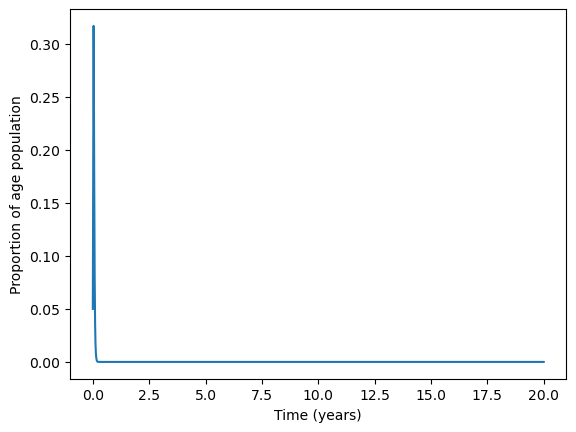

In [19]:
plt.plot(t/365,ret[:,1]+ret[:,4]+ret[:,7], label = 'Total Infected')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.show()

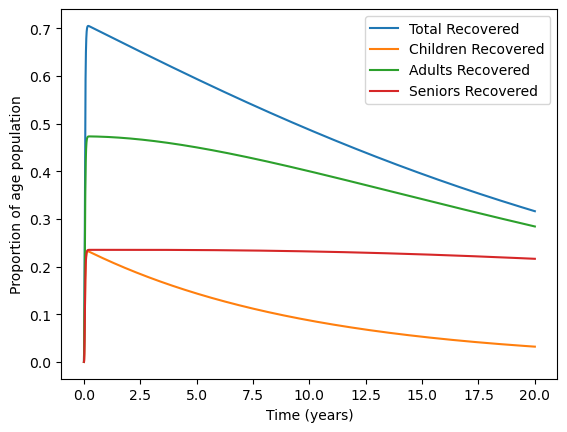

In [20]:
plt.plot(t/365,ret[:,2]+ret[:,5], label = 'Total Recovered')
plt.plot(t/365, ret[:,2], label = 'Children Recovered')
plt.plot(t/365,ret[:,5], label = 'Adults Recovered')
plt.plot(t/365,ret[:,8], label = 'Seniors Recovered')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

## Three age groups -  seasonality + deterministic introduction

In [51]:
seasons = 20
t_single_season = np.arange(0,365,1) 
t_total_season = np.arange(0,365*seasons,1)
I_0_season = []
I_1_season = []
I_2_season = []

prop_imported = 0.05

alpha_0 = 0.25
alpha_1 = 0.50
alpha_2 = 0.25


beta_0 = 0.0 
beta_aug = 6*(1/7.0) # run with 6 as well
t_start = 0
t_season = 60
t_year = 365

gamma = 1/(7.0)
l_0 = 1/(10*365)
l_1 = 1/(70*365)

mu_0 = 0.0
mu_1 = (l_0*alpha_0 - l_1*alpha_1)/(alpha_1)
mu_2 = (l_1*alpha_1)/(alpha_2)
nu = (l_0 + mu_0)*(alpha_0)

y0 = alpha_0, 0.0, 0.0, alpha_1*0.9, alpha_1*0.1, 0.0, alpha_2, 0.0, 0.0

In [52]:
for season in np.arange(seasons):
    ret = odeint(three_groups_seasonal_model, y0, t_single_season, args=(beta_0, beta_aug, t_start, t_season, t_year, mu_0, mu_1, mu_2, gamma, l_0, l_1,  nu))
    I_0_season.append(list(ret[:,1]))
    I_1_season.append(list(ret[:,4]))
    I_2_season.append(list(ret[:,7]))
    y0 = ret[-1,:].copy()
    num = 0.05
    y0 = modify_initial_condition(y0,num)

In [53]:
I_0_season = [item for sublist in I_0_season for item in sublist]
I_1_season = [item for sublist in I_1_season for item in sublist]
I_2_season = [item for sublist in I_2_season for item in sublist]

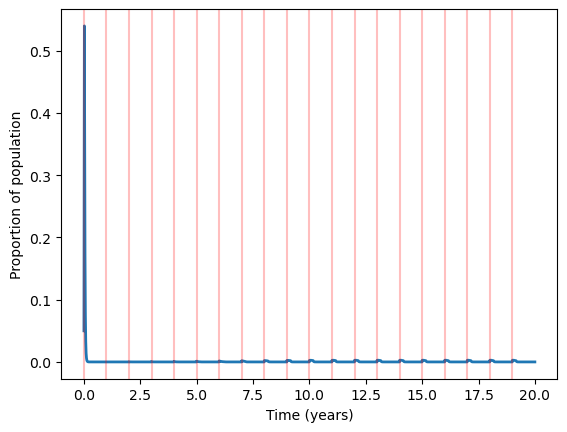

In [54]:
plt.plot(t_total_season/365,np.array(I_0_season) + np.array(I_1_season) + np.array(I_2_season), linewidth = 2)
for season in np.arange(seasons):
    plt.axvline(season, color = 'r', alpha = 0.25)
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.show()

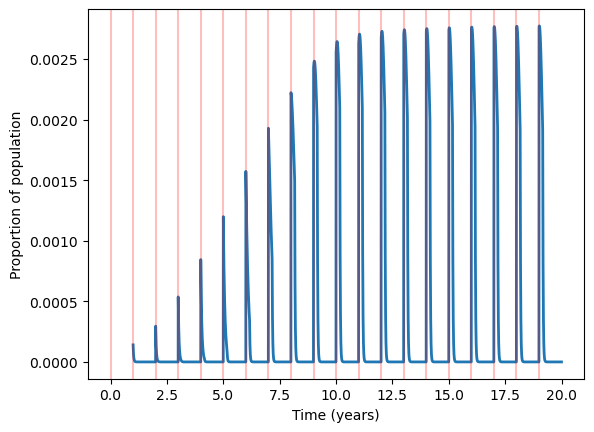

In [55]:
plt.plot(t_total_season[365:]/365,np.array(I_0_season)[365:] + np.array(I_1_season)[365:] + np.array(I_2_season)[365:], linewidth = 2)
for season in np.arange(seasons):
    plt.axvline(season, color = 'r', alpha = 0.25)
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.show()

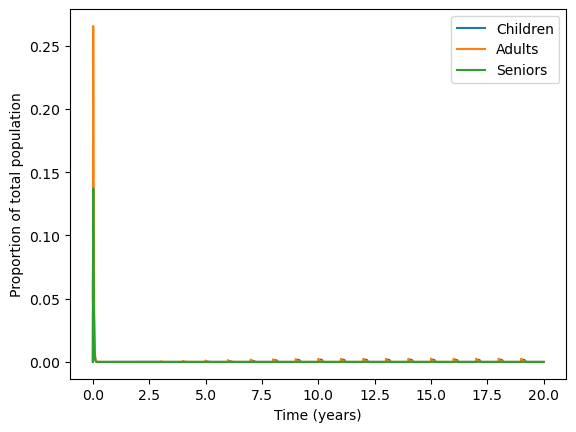

In [56]:
plt.plot(t_total_season/365,np.array(I_0_season), label = 'Children')
plt.plot(t_total_season/365,np.array(I_1_season), label = 'Adults')
plt.plot(t_total_season/365,np.array(I_2_season), label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of total population')
plt.legend()
plt.show()

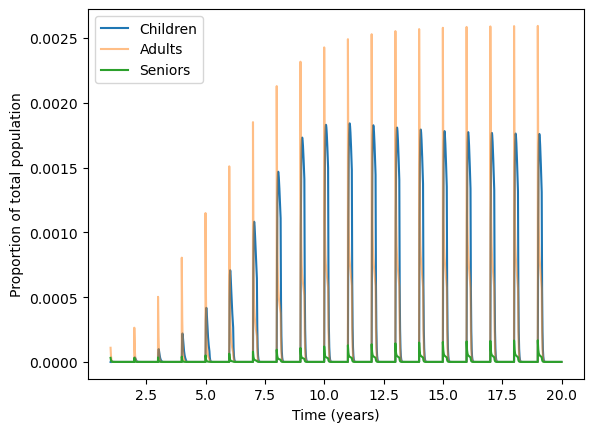

In [57]:
plt.plot(t_total_season[365:]/365,np.array(I_0_season)[365:], label = 'Children')
plt.plot(t_total_season[365:]/365,np.array(I_1_season)[365:], label = 'Adults', alpha = 0.5)
plt.plot(t_total_season[365:]/365,np.array(I_2_season)[365:], label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of total population')
plt.legend()
plt.show()

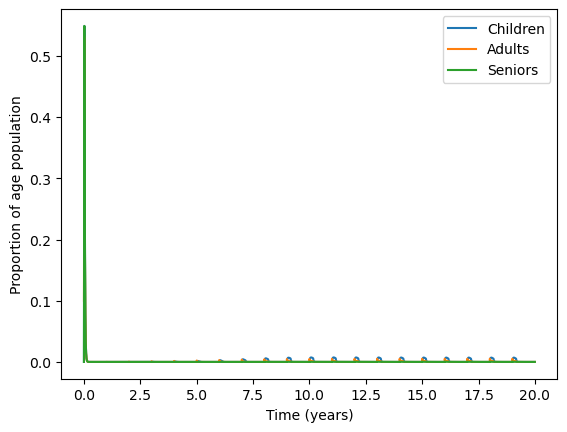

In [58]:
plt.plot(t_total_season/365,np.array(I_0_season)/alpha_0, label = 'Children')
plt.plot(t_total_season/365,np.array(I_1_season)/alpha_1, label = 'Adults')
plt.plot(t_total_season/365,np.array(I_2_season)/alpha_2, label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

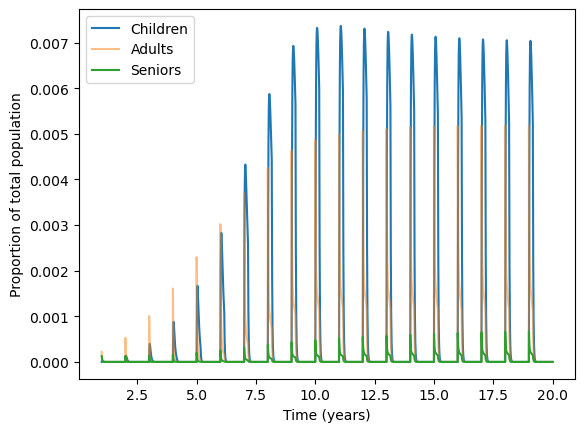

In [59]:
plt.plot(t_total_season[365:]/365,np.array(I_0_season)[365:]/alpha_0, label = 'Children')
plt.plot(t_total_season[365:]/365,np.array(I_1_season)[365:]/alpha_1, label = 'Adults', alpha = 0.5)
plt.plot(t_total_season[365:]/365,np.array(I_2_season)[365:]/alpha_2, label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of total population')
plt.legend()
plt.show()

In [60]:
IT = I_0_season + I_1_season + I_2_season
prop_0_year = []
prop_1_year = []
prop_2_year = []

for i in range(season):
    total_cases = sum(I_0_season[i*365:(i+1)*365]) + sum(I_1_season[i*365:(i+1)*365]) + sum(I_2_season[i*365:(i+1)*365])
    prop_0_year.append(sum(I_0_season[i*365:(i+1)*365])/(alpha_0*total_cases))
    prop_1_year.append(sum(I_1_season[i*365:(i+1)*365])/((alpha_1)*total_cases))
    prop_2_year.append(sum(I_2_season[i*365:(i+1)*365])/((alpha_2)*total_cases))

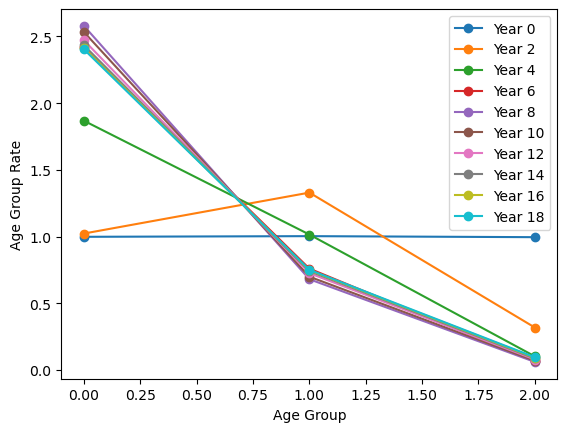

In [61]:
for i in range(int(seasons/2)):
    plt.plot([0,1,2],[prop_0_year[2*i], prop_1_year[2*i], prop_2_year[2*i]], '-o', label = 'Year '+str(2*i))
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Age Group Rate')
plt.show()

## Three age groups -  seasonality + stochastic introduction

In [34]:
seasons = 20
t_single_season = np.arange(0,365,1) 
t_total_season = np.arange(0,365*seasons,1)
I_0_season = []
I_1_season = []
I_2_season = []

prop_imported = 0.05

alpha_0 = 0.25
alpha_1 = 0.50
alpha_2 = 0.25


beta_0 = 0.0 
beta_aug = 3*(1/7.0) # run with 6 as well
t_start = 0
t_season = 60
t_year = 365

gamma = 1/(7.0)
l_0 = 1/(10*365)
l_1 = 1/(70*365)

mu_0 = 0.0
mu_1 = (l_0*alpha_0 - l_1*alpha_1)/(alpha_1)
mu_2 = (l_1*alpha_1)/(alpha_2)
nu = (l_0 + mu_0)*(alpha_0)

y0 = alpha_0, 0.0, 0.0, alpha_1*0.9, alpha_1*0.1, 0.0, alpha_2, 0.0, 0.0

In [35]:
for season in np.arange(seasons):
    ret = odeint(three_groups_seasonal_model, y0, t_single_season, args=(beta_0, beta_aug, t_start, t_season, t_year, mu_0, mu_1, mu_2, gamma, l_0, l_1,  nu))
    I_0_season.append(list(ret[:,1]))
    I_1_season.append(list(ret[:,4]))
    I_2_season.append(list(ret[:,7]))
    y0 = ret[-1,:].copy()
    num = max(0,np.random.normal(0.05,0.2))
    y0 = modify_initial_condition(y0,num)

In [36]:
I_0_season = [item for sublist in I_0_season for item in sublist]
I_1_season = [item for sublist in I_1_season for item in sublist]
I_2_season = [item for sublist in I_2_season for item in sublist]

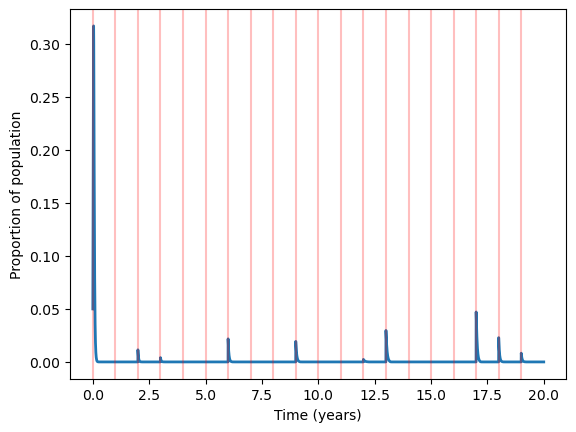

In [38]:
plt.plot(t_total_season/365,np.array(I_0_season) + np.array(I_1_season) + np.array(I_2_season), linewidth = 2)
for season in np.arange(seasons):
    plt.axvline(season, color = 'r', alpha = 0.25)
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.show()

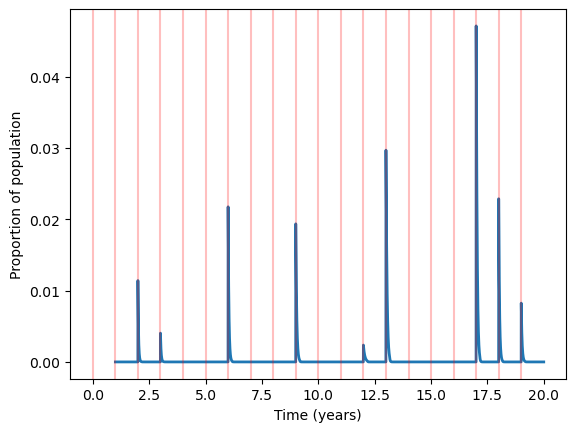

In [40]:
plt.plot(t_total_season[365:]/365,np.array(I_0_season)[365:] + np.array(I_1_season)[365:] + np.array(I_2_season)[365:], linewidth = 2)
for season in np.arange(seasons):
    plt.axvline(season, color = 'r', alpha = 0.25)
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.show()

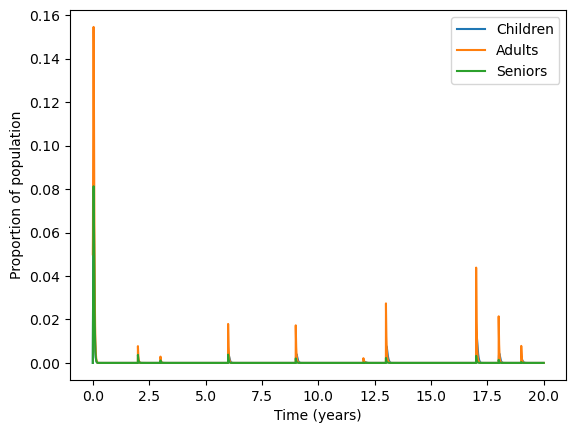

In [41]:
plt.plot(t_total_season/365,np.array(I_0_season), label = 'Children')
plt.plot(t_total_season/365,np.array(I_1_season), label = 'Adults')
plt.plot(t_total_season/365,np.array(I_2_season), label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.legend()
plt.show()

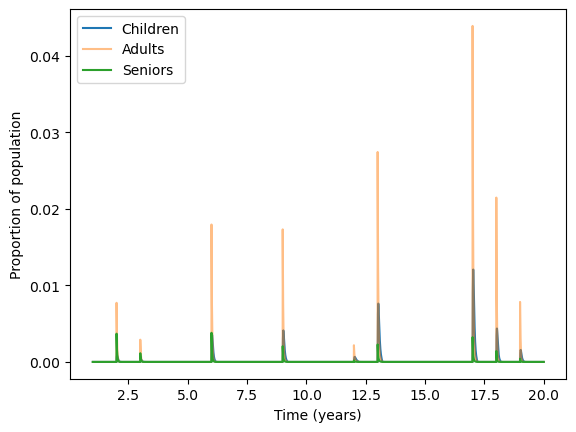

In [43]:
plt.plot(t_total_season[365:]/365,np.array(I_0_season)[365:], label = 'Children')
plt.plot(t_total_season[365:]/365,np.array(I_1_season)[365:], label = 'Adults', alpha = 0.5)
plt.plot(t_total_season[365:]/365,np.array(I_2_season)[365:], label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of population')
plt.legend()
plt.show()

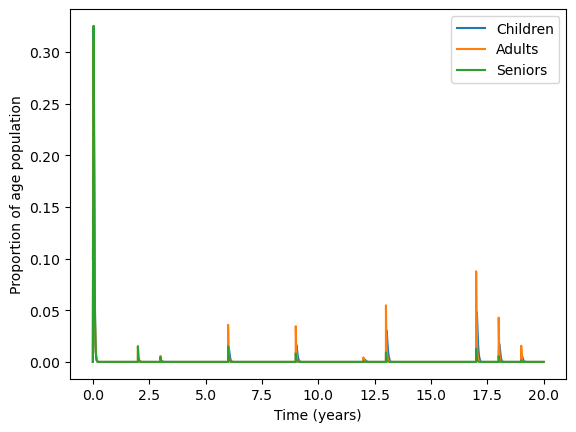

In [44]:
plt.plot(t_total_season/365,np.array(I_0_season)/alpha_0, label = 'Children')
plt.plot(t_total_season/365,np.array(I_1_season)/alpha_1, label = 'Adults')
plt.plot(t_total_season/365,np.array(I_2_season)/alpha_2, label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

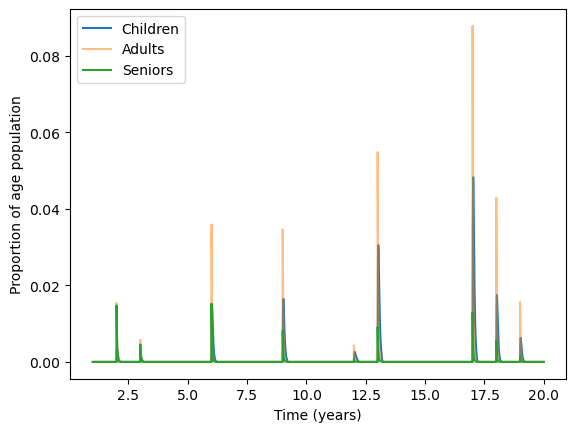

In [46]:
plt.plot(t_total_season[365:]/365,np.array(I_0_season)[365:]/alpha_0, label = 'Children')
plt.plot(t_total_season[365:]/365,np.array(I_1_season)[365:]/alpha_1, label = 'Adults', alpha = 0.5)
plt.plot(t_total_season[365:]/365,np.array(I_2_season)[365:]/alpha_2, label = 'Seniors')
plt.xlabel('Time (years)')
plt.ylabel('Proportion of age population')
plt.legend()
plt.show()

In [49]:
IT = I_0_season + I_1_season + I_2_season
prop_0_year = []
prop_1_year = []
prop_2_year = []

for i in range(season):
    total_cases = sum(I_0_season[i*365:(i+1)*365]) + sum(I_1_season[i*365:(i+1)*365]) + sum(I_2_season[i*365:(i+1)*365])
    prop_0_year.append(max(sum(I_0_season[i*365:(i+1)*365])/(alpha_0*total_cases),0))
    prop_1_year.append(max(sum(I_1_season[i*365:(i+1)*365])/((alpha_1)*total_cases),0))
    prop_2_year.append(max(sum(I_2_season[i*365:(i+1)*365])/((alpha_2)*total_cases),0))

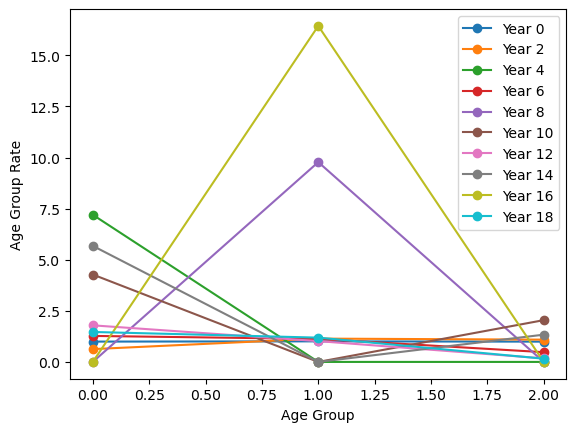

In [50]:
for i in range(int(seasons/2)):
    plt.plot([0,1,2],[prop_0_year[2*i], prop_1_year[2*i], prop_2_year[2*i]], '-o', label = 'Year '+str(2*i))
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Age Group Rate')
plt.show()

## Vaccination strategies